In [119]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [154]:
data = pd.read_csv("./data/competition_data.csv")

-avg_qty_orders_item_domain_30days Average number of orders a random item of this domain made on the last month


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199972 entries, 0 to 199971
Data columns (total 57 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   accepts_mercadopago                199972 non-null  bool   
 1   available_quantity                 199972 non-null  int64  
 2   avg_gmv_item_domain_30days         195607 non-null  float64
 3   avg_gmv_item_sel                   195607 non-null  float64
 4   avg_gmv_seller_bday                195607 non-null  float64
 5   avg_qty_orders_item_domain_30days  195607 non-null  float64
 6   avg_qty_orders_item_sel_30days     195607 non-null  float64
 7   avg_si_item_sel_30day              195607 non-null  float64
 8   benefit                            199971 non-null  float64
 9   boosted                            199972 non-null  bool   
 10  category_id                        199972 non-null  object 
 11  conversion                         1807

In [144]:
data.drop(columns=['benefit', 'deal_print_id','etl_version', 'full_name', 
                   'warranty', 'item_id', 'main_picture',
                    'site_id','uid', 'user_id', 'category_id', 'title', 'tags', 'product_id'], axis= "columns", inplace=True)

#data['is_pdp'] = data['is_pdp'].astype('bool')

In [145]:
data.shape

(199972, 43)

In [146]:
data.isna().sum()
#elimina las observaciones que tienen valores nulos en avg_gmv_item_sel
data.dropna(subset=['avg_gmv_item_sel'], inplace=True)


Variables con texto: full_name, warranty, tags, title, category_id

Convertir: print_server_timestamp


In [147]:
data.drop(columns=["print_server_timestamp", 'date', 'platform', "domain_id"], axis= "columns", inplace=True)

In [148]:
data = pd.get_dummies(data,columns = ["listing_type_id", "logistic_type" ],dummy_na = False, dtype = int )
data = pd.get_dummies(data,columns = ["is_pdp"],dummy_na = True, dtype = bool )

In [149]:
train_data = data[data["ROW_ID"].isna()]
test_data = data[data["ROW_ID"].notna()]

x_train = train_data.drop(columns=["conversion", "ROW_ID"])
y_train = train_data["conversion"]
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=3456)
X_test = test_data.drop(columns=["conversion"])

In [150]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic',
                            seed = 100,
                            eval_metric = 'auc')

In [151]:
clf_xgb.fit(X_train, Y_train, verbose = True, eval_set = [(X_val, Y_val)])

/Users/tomasglauberman/opt/anaconda3/envs/td6/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/tomasglauberman/opt/anaconda3/envs/td6/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/tomasglauberman/opt/anaconda3/envs/td6/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/tomasglauberman/opt/anaconda3/envs/td6/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

[0]	validation_0-auc:0.85804
[1]	validation_0-auc:0.86087
[2]	validation_0-auc:0.86185
[3]	validation_0-auc:0.86251
[4]	validation_0-auc:0.86447
[5]	validation_0-auc:0.86531
[6]	validation_0-auc:0.86558
[7]	validation_0-auc:0.86608
[8]	validation_0-auc:0.86700
[9]	validation_0-auc:0.86754
[10]	validation_0-auc:0.86841
[11]	validation_0-auc:0.86913
[12]	validation_0-auc:0.86922
[13]	validation_0-auc:0.86976
[14]	validation_0-auc:0.87054
[15]	validation_0-auc:0.87132
[16]	validation_0-auc:0.87169
[17]	validation_0-auc:0.87223
[18]	validation_0-auc:0.87224
[19]	validation_0-auc:0.87232
[20]	validation_0-auc:0.87278
[21]	validation_0-auc:0.87308
[22]	validation_0-auc:0.87358
[23]	validation_0-auc:0.87429
[24]	validation_0-auc:0.87443
[25]	validation_0-auc:0.87456
[26]	validation_0-auc:0.87465
[27]	validation_0-auc:0.87462
[28]	validation_0-auc:0.87475
[29]	validation_0-auc:0.87549
[30]	validation_0-auc:0.87607
[31]	validation_0-auc:0.87603
[32]	validation_0-auc:0.87612
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
y_preds = clf_xgb.predict_proba(X_test.drop(columns=["ROW_ID"]))[:, clf_xgb.classes_ == 1].squeeze()

/Users/tomasglauberman/opt/anaconda3/envs/td6/lib/python3.11/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/tomasglauberman/opt/anaconda3/envs/td6/lib/python3.11/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/tomasglauberman/opt/anaconda3/envs/td6/lib/python3.11/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/tomasglauberman/opt/anaconda3/envs/td6/lib/python3.11/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. U

In [152]:
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': clf_xgb.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.reset_index(drop=True, inplace=True)
print(feature_importance)

                              feature  importance
0                          is_pdp_nan    0.691216
1                      print_position    0.020292
2            total_orders_item_30days    0.018534
3                              offset    0.017148
4           logistic_type_xd_drop_off    0.017070
5                logistic_type_custom    0.017020
6         logistic_type_not_specified    0.013301
7                       free_shipping    0.013167
8                               price    0.009370
9                         fulfillment    0.008859
10           listing_type_id_gold_pro    0.008676
11             total_si_domain_30days    0.007476
12         total_orders_domain_30days    0.007017
13         avg_gmv_item_domain_30days    0.006813
14                             health    0.006733
15                     original_price    0.006638
16  avg_qty_orders_item_domain_30days    0.006332
17             logistic_type_drop_off    0.006299
18                total_visits_domain    0.006207


In [116]:
preds_final = [True if x > 0.50 else False for x in y_preds]
print(preds_final.count(True), preds_final.count(False))
#infomracion estadistica de los scores
print("Media: ", y_preds.mean(), ", Desvio: ", y_preds.std())

174 19037
Media:  0.08019693 , Desvio:  0.11669169


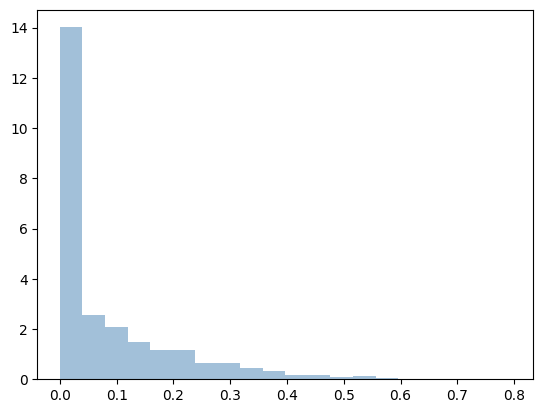

In [114]:
plt.hist(y_preds, bins=20, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')
plt.show()

In [11]:
submission_df = pd.DataFrame({"ROW_ID": X_test["ROW_ID"], "conversion": y_preds})
submission_df["ROW_ID"] = submission_df["ROW_ID"].astype(int)
submission_df.to_csv("./outputs/primer_modelo_limp_data.csv", sep=",", index=False)